# Question 2. IWAL algorithm implementation (50 points)

The purpose of this question is to implement Importance Weighted Active Learning (IWAL) algorithm. For this question, you will not use modAL, but instead will implement IWAL routine from scratch using scikit-learn, NumPy and native Python. 

In this question, we will use a simple synthetic dataset for a binary classification problem. Each data point has only 2 features. The dataset is provided in 2 files -- “data_iwal.npy”, which contains features and “labels_iwal.npy”, which contains labels. 

For simplicity, you will implement bootstrapping rejection sampling subroutine with logistic regression and hinge loss.   

𝐂𝐨𝐦𝐩𝐥𝐞𝐭𝐞 𝐭𝐡𝐞 𝐜𝐨𝐝𝐞 𝐮𝐧𝐝𝐞𝐫 ###𝐓𝐎 𝐃𝐎 𝐢𝐧 𝐞𝐚𝐜𝐡 𝐜𝐞𝐥𝐥 𝐚𝐧𝐝 𝐩𝐫𝐨𝐝𝐮𝐜𝐞 𝐭𝐡𝐞 𝐫𝐞𝐪𝐮𝐢𝐫𝐞𝐝 𝐩𝐥𝐨𝐭𝐬.  Feel free to define any helper functions as you see fit. You may import and use any modules in scikit-learn and NumPy to help with your implementations.

## Imports

Here we import necessary modules. Feel free to add something else here if you need it!

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import hinge_loss, log_loss
from sklearn.linear_model import LogisticRegression

## Reading data

Here we read the data and split it into train and test datasets. Train will be used to train our classification model and test will be used to validate the performance, monitor overfitting and compare the results of the model trained with Active Learning with the ones of the model trained from scratch. We set aside 1/3 of the dataset for validation.

In [2]:
X = np.load("data/q2/data_iwal.npy")
y = np.load("data/q2/labels_iwal.npy")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(X[0:2])
print(y[0:2])

(134, 2)
(134,)
(66, 2)
(66,)
[[2.59193175 1.14706863]
 [1.7756532  1.15670278]]
[1 1]


## Part 2.1
Type your answers for the theoretical questions below.

1. What is the idea behind IWAL algorithm?

**Your answer goes here**
Corrects for sample bias using weighting.


2. What are the assumptions made for the IWAL algorithm?

**Your answer goes here**

3. What are the pros and cons of IWAL algorithm?

**Your answer goes here**

## Part 2.2 Implement IWAL algorithm

In this part you will implement a function that performs a single query of Algorithm 1 IWAL (subroutine rejection-sampling) from the paper. Below is the function description that you can follow in your implementation.

### Implemented Equations

$h_t = \underset{h \in H}{argmin}\sum_{(x,y,c)\in S_t}c \cdot l(h(x),y)$

In [5]:
# implemented in custom Python package iwal_functions

## Part 2.3 Implement bootstrapping rejection sampling subroutine
In this part you will implement bootstrapping rejection sampling subroutine from the paper, section 7.2

### Implemented Equations
$p_t = p_{min}+(1-p_{min})[\underset{y;h_i,h_j \in H}{max}L(h_i(x),y)-L(h_j(x),y)]$

where $p_{min}$ is a lower bound on the sampling probability

In [6]:
# implemented in custom Python package iwal_functions

## Part 2.4 Organize all implemented parts into a single pipeline
You implemented all parts of the IWAL algorithm with bootstrap rejection sampling. Now organize it into a pipeline.

In [7]:
%%time

from packages.iwal import iwal  # my custom package

# fill hypothesis_space
H = []
num_h = 10
for i in range(num_h):
    lr = LogisticRegression()
    H.append(lr)

# additional arguments
bootstrap_size = 10
labels = [0,1]
p_min = 0.1  
history = {'X': [],'y': [],'c': [],'Q': []}
selected = []
rejection_threshold = 'bootstrap'

# Perform queries and record loss
losses = []
n_query = 50
for t in range(n_query):
    
    # select sample 
    x_t = X_train[t].reshape(1,2)
    y_t = y_train[t].reshape(1,)
    
    # select optimal hypothesis
    h_t = iwal.iwal_query(x_t,y_t,H,history,selected,labels,rejection_threshold,bootstrap_size,p_min)

    # calculate loss only for fitted models
    if h_t:

        # calculate loss and store for later
        loss_t = log_loss(y_test, h_t.predict_proba(X_test)) 
        losses.append(loss_t)
     

loss_i,loss_j 1.763247687129783 1.763247687129783
loss_i,loss_j 0.1881227781112242 0.1881227781112242
loss_i,loss_j 1.763247687129783 2.1269551703669727
loss_i,loss_j 0.1881227781112242 0.12692433548483445
loss_i,loss_j 1.763247687129783 2.2649344371207505
loss_i,loss_j 0.1881227781112242 0.10963278678103582
loss_i,loss_j 1.763247687129783 2.156415148317239
loss_i,loss_j 0.1881227781112242 0.12300333495010109
loss_i,loss_j 1.763247687129783 1.949853649411532
loss_i,loss_j 0.1881227781112242 0.15349493904397374
loss_i,loss_j 1.763247687129783 2.164007978892409
loss_i,loss_j 0.1881227781112242 0.12201377624731237
loss_i,loss_j 1.763247687129783 2.165561430650263
loss_i,loss_j 0.1881227781112242 0.12181236211709744
loss_i,loss_j 1.763247687129783 1.9284383879341902
loss_i,loss_j 0.1881227781112242 0.1570925504128358
loss_i,loss_j 1.763247687129783 1.8228833608314268
loss_i,loss_j 0.1881227781112242 0.1762113562741333
loss_i,loss_j 1.763247687129783 1.785356502008746
loss_i,loss_j 0.188122

loss_i,loss_j 0.1836070847381432 0.1836070847381432
loss_i,loss_j 0.0769113759800195 0.0769113759800195
loss_i,loss_j 2.603310708107085 2.603310708107085
loss_i,loss_j 0.0769113759800195 0.06808659083785831
loss_i,loss_j 2.603310708107085 2.720825134430873
loss_i,loss_j 0.0769113759800195 0.0741343236737101
loss_i,loss_j 2.603310708107085 2.638714823031067
loss_i,loss_j 0.0769113759800195 0.08020428531330963
loss_i,loss_j 2.603310708107085 2.5630124594184953
loss_i,loss_j 0.0769113759800195 0.06774459610442203
loss_i,loss_j 2.603310708107085 2.725691667968829
loss_i,loss_j 0.0769113759800195 0.07803323888511582
loss_i,loss_j 2.603310708107085 2.5893833197283485
loss_i,loss_j 0.0769113759800195 0.08566010208578097
loss_i,loss_j 2.603310708107085 2.499892449230234
loss_i,loss_j 0.0769113759800195 0.08315189566080507
loss_i,loss_j 2.603310708107085 2.528374146706082
loss_i,loss_j 0.0769113759800195 0.07368534669800443
loss_i,loss_j 2.603310708107085 2.644567776345434
loss_i,loss_j 0.07691

loss_i,loss_j 0.01971586826344591 0.01971586826344591
loss_i,loss_j 3.936173209575918 3.936173209575918
loss_i,loss_j 0.01971586826344591 0.015922193669935667
loss_i,loss_j 3.936173209575918 4.147991848401012
loss_i,loss_j 0.01971586826344591 0.026014318288720986
loss_i,loss_j 3.936173209575918 3.662087150734999
loss_i,loss_j 0.01971586826344591 0.0279839906297551
loss_i,loss_j 3.936173209575918 3.5900820617545515
loss_i,loss_j 0.01971586826344591 0.018582166172284226
loss_i,loss_j 3.936173209575918 3.9948296619117714
loss_i,loss_j 0.01971586826344591 0.033861487420416295
loss_i,loss_j 3.936173209575918 3.4023599438533716
loss_i,loss_j 0.01971586826344591 0.027516824403847954
loss_i,loss_j 3.936173209575918 3.606684528293839
loss_i,loss_j 0.01971586826344591 0.018168321468589845
loss_i,loss_j 3.936173209575918 4.017146187224794
loss_i,loss_j 0.01971586826344591 0.01933543572825909
loss_i,loss_j 3.936173209575918 3.955467958902172
loss_i,loss_j 0.01971586826344591 0.01928188814831299
lo

loss_i,loss_j 2.2404687350110692 2.2404687350110692
loss_i,loss_j 0.11250667232591517 0.11250667232591517
loss_i,loss_j 2.2404687350110692 2.6654754774690934
loss_i,loss_j 0.11250667232591517 0.07210442357139994
loss_i,loss_j 2.2404687350110692 2.6795630557210925
loss_i,loss_j 0.11250667232591517 0.0710590606344719
loss_i,loss_j 2.2404687350110692 2.56575466806721
loss_i,loss_j 0.11250667232591517 0.07997562772093726
loss_i,loss_j 2.2404687350110692 2.4232683263867294
loss_i,loss_j 0.11250667232591517 0.09280792675472434
loss_i,loss_j 2.2404687350110692 2.503389031515319
loss_i,loss_j 0.11250667232591517 0.08534797666872229
loss_i,loss_j 2.2404687350110692 2.601809866944917
loss_i,loss_j 0.11250667232591517 0.07703146006774678
loss_i,loss_j 2.2404687350110692 2.4711667554107852
loss_i,loss_j 0.11250667232591517 0.0882698704266413
loss_i,loss_j 2.2404687350110692 2.2987198468931394
loss_i,loss_j 0.11250667232591517 0.10579091113116829
loss_i,loss_j 2.2404687350110692 2.256634918765932
l

loss_i,loss_j 0.6359809525036662 0.5929448218557064
loss_i,loss_j 0.7537805934427408 0.7986014152590294
loss_i,loss_j 0.6359809525036662 0.5977603280725102
loss_i,loss_j 0.7537805934427408 0.7533972212165184
loss_i,loss_j 0.6359809525036662 0.6363218455838432
loss_i,loss_j 0.7537805934427408 0.73275429982068
loss_i,loss_j 0.6359809525036662 0.6550492022247331
loss_i,loss_j 0.7537805934427408 0.845815417405616
loss_i,loss_j 0.6359809525036662 0.5607290641550177
loss_i,loss_j 0.7537805934427408 0.8752617282375301
loss_i,loss_j 0.6359809525036662 0.5391443906280267
loss_i,loss_j 0.7537805934427408 0.7526881392360574
loss_i,loss_j 0.6359809525036662 0.6369530096887547
loss_i,loss_j 0.7537805934427408 0.7386920464009389
loss_i,loss_j 0.6359809525036662 0.6495866033920121
loss_i,loss_j 0.8529663832570902 0.7537805934427408
loss_i,loss_j 0.5553853833970782 0.6359809525036662
loss_i,loss_j 0.8529663832570902 0.8529663832570902
loss_i,loss_j 0.5553853833970782 0.5553853833970782
loss_i,loss_j 0

loss_i,loss_j 0.022771824007221934 0.021343113417162766
loss_i,loss_j 3.793595601994052 3.8576787243401025
loss_i,loss_j 0.017302513057304708 0.022771824007221934
loss_i,loss_j 4.065542307119945 3.793595601994052
loss_i,loss_j 0.017302513057304708 0.017302513057304708
loss_i,loss_j 4.065542307119945 4.065542307119945
loss_i,loss_j 0.017302513057304708 0.01986094258427826
loss_i,loss_j 4.065542307119945 3.928914195683501
loss_i,loss_j 0.017302513057304708 0.022605774902453586
loss_i,loss_j 4.065542307119945 3.80083147368581
loss_i,loss_j 0.017302513057304708 0.01855569164967645
loss_i,loss_j 4.065542307119945 3.9962422089769385
loss_i,loss_j 0.017302513057304708 0.022585924417308906
loss_i,loss_j 4.065542307119945 3.8017000872592397
loss_i,loss_j 0.017302513057304708 0.02419583341694343
loss_i,loss_j 4.065542307119945 3.7336483570592156
loss_i,loss_j 0.017302513057304708 0.023355364295333064
loss_i,loss_j 4.065542307119945 3.768583541184189
loss_i,loss_j 0.017302513057304708 0.021268439

loss_i,loss_j 0.03964799806022959 0.03759547394550022
loss_i,loss_j 3.2474733238587175 3.250500181818873
loss_i,loss_j 0.03964799806022959 0.03952577094719202
loss_i,loss_j 3.778626491468127 3.2474733238587175
loss_i,loss_j 0.023119262582116433 0.03964799806022959
loss_i,loss_j 3.778626491468127 3.778626491468127
loss_i,loss_j 0.023119262582116433 0.023119262582116433
loss_i,loss_j 3.778626491468127 3.5402797758169986
loss_i,loss_j 0.023119262582116433 0.02943417732756559
loss_i,loss_j 3.778626491468127 3.4173517622387877
loss_i,loss_j 0.023119262582116433 0.033349131930295865
loss_i,loss_j 3.778626491468127 3.4134039239535534
loss_i,loss_j 0.023119262582116433 0.03348328245004667
loss_i,loss_j 3.778626491468127 3.215738300503009
loss_i,loss_j 0.023119262582116433 0.04095293857415629
loss_i,loss_j 3.778626491468127 3.506051560049196
loss_i,loss_j 0.023119262582116433 0.030474871488248404
loss_i,loss_j 3.778626491468127 3.601083327246508
loss_i,loss_j 0.023119262582116433 0.027673542541

loss_i,loss_j 2.3363306542573987 2.265292808463411
loss_i,loss_j 0.10168034791881515 0.09873654310510517
loss_i,loss_j 2.3363306542573987 2.364262257015356
loss_i,loss_j 0.10168034791881515 0.09779464266051187
loss_i,loss_j 2.3363306542573987 2.3733843437097626
loss_i,loss_j 0.09431075256242091 0.10168034791881515
loss_i,loss_j 2.4079448696191337 2.3363306542573987
loss_i,loss_j 0.09431075256242091 0.09431075256242091
loss_i,loss_j 2.4079448696191337 2.4079448696191337
loss_i,loss_j 0.09431075256242091 0.10661463071174404
loss_i,loss_j 2.4079448696191337 2.291368276529397
loss_i,loss_j 0.09431075256242091 0.11294163641674915
loss_i,loss_j 2.4079448696191337 2.2368234680603982
loss_i,loss_j 0.09431075256242091 0.09328141377005038
loss_i,loss_j 2.4079448696191337 2.418412574212652
loss_i,loss_j 0.09431075256242091 0.1122702133881912
loss_i,loss_j 2.4079448696191337 2.242456663991252
loss_i,loss_j 0.09431075256242091 0.11903309705439205
loss_i,loss_j 2.4079448696191337 2.1872799463272057


loss_i,loss_j 3.8135442866102682 3.0166711258210306
loss_i,loss_j 0.02231700046400267 0.03905000829554783
loss_i,loss_j 3.8135442866102682 3.2623736575864584
loss_i,loss_j 0.02231700046400267 0.02406836949153544
loss_i,loss_j 3.8135442866102682 3.7388668176870494
loss_i,loss_j 0.02231700046400267 0.026171011708502268
loss_i,loss_j 3.8135442866102682 3.6561598716994155
loss_i,loss_j 0.02231700046400267 0.026001388263967168
loss_i,loss_j 3.8135442866102682 3.662577872234172
loss_i,loss_j 0.03839554687248458 0.02627510422442528
loss_i,loss_j 3.2789501414155446 3.6522421819489352
loss_i,loss_j 0.03839554687248458 0.02231700046400267
loss_i,loss_j 3.2789501414155446 3.8135442866102682
loss_i,loss_j 0.03839554687248458 0.03839554687248458
loss_i,loss_j 3.2789501414155446 3.2789501414155446
loss_i,loss_j 0.03839554687248458 0.040350398444493146
loss_i,loss_j 3.2789501414155446 3.2302613699716987
loss_i,loss_j 0.03839554687248458 0.025949770039123733
loss_i,loss_j 3.2789501414155446 3.66453935

loss_i,loss_j 0.008015044837369811 0.014571449728276216
loss_i,loss_j 4.830439744468267 4.235968040729036
loss_i,loss_j 0.008015044837369811 0.0158501300406506
loss_i,loss_j 4.830439744468267 4.152492171501362
loss_i,loss_j 0.008015044837369811 0.00989359144729614
loss_i,loss_j 4.830439744468267 4.620810777267453
loss_i,loss_j 0.008015044837369811 0.020322061176919204
loss_i,loss_j 4.830439744468267 3.9061920484346957
loss_i,loss_j 0.008015044837369811 0.015288829846692492
loss_i,loss_j 4.830439744468267 4.188267468027201
loss_i,loss_j 0.008015044837369811 0.009220513230435006
loss_i,loss_j 4.830439744468267 4.690931292263402
loss_i,loss_j 0.008015044837369811 0.010320877778824396
loss_i,loss_j 4.830439744468267 4.578742466996578
loss_i,loss_j 0.008015044837369811 0.010327371543156787
loss_i,loss_j 4.830439744468267 4.578116718933498
loss_i,loss_j 0.014571449728276216 0.01053205178288075
loss_i,loss_j 4.235968040729036 4.558593524699119
loss_i,loss_j 0.014571449728276216 0.008015044837

loss_i,loss_j 0.4896559410322997 0.4896559410322997
loss_i,loss_j 0.9489100285428212 0.9387852761613388
loss_i,loss_j 0.4896559410322997 0.49610554536680607
loss_i,loss_j 0.9489100285428212 0.9211351241128042
loss_i,loss_j 0.4896559410322997 0.5076090178634941
loss_i,loss_j 0.9489100285428212 0.8470013783960165
loss_i,loss_j 0.4896559410322997 0.559838207128475
loss_i,loss_j 0.9489100285428212 0.8706842973122992
loss_i,loss_j 0.4896559410322997 0.5424280272266582
loss_i,loss_j 0.9489100285428212 0.9613428460117595
loss_i,loss_j 0.4896559410322997 0.4818803832728605
loss_i,loss_j 0.9489100285428212 0.942830244824483
loss_i,loss_j 0.4896559410322997 0.49351601321104394
loss_i,loss_j 0.9489100285428212 0.8307196123216957
loss_i,loss_j 0.4896559410322997 0.5722323656165589
loss_i,loss_j 0.9489100285428212 0.8143030448318545
loss_i,loss_j 0.4896559410322997 0.5850965688423838
loss_i,loss_j 0.9387852761613388 0.824183029065804
loss_i,loss_j 0.49610554536680607 0.5773094384346671
loss_i,loss_

loss_i,loss_j 1.791562296630705 1.650676105017363
loss_i,loss_j 0.1823609959790979 0.21309434737735802
loss_i,loss_j 1.791562296630705 1.5906524644660778
loss_i,loss_j 0.1823609959790979 0.22789557546232594
loss_i,loss_j 1.791562296630705 1.5418273337082151
loss_i,loss_j 0.1823609959790979 0.2407853992609411
loss_i,loss_j 1.791562296630705 1.7145439084747915
loss_i,loss_j 0.1823609959790979 0.19850681755551913
loss_i,loss_j 1.791562296630705 1.7396031845288282
loss_i,loss_j 0.1823609959790979 0.1930873772100328
loss_i,loss_j 1.791562296630705 1.546628794723911
loss_i,loss_j 0.1823609959790979 0.23948219392593978
loss_i,loss_j 1.791562296630705 1.517949914906298
loss_i,loss_j 0.1823609959790979 0.24738594398568126
loss_i,loss_j 1.7000446953909238 1.5275148845896558
loss_i,loss_j 0.20171890579386362 0.2447176738907544
loss_i,loss_j 1.7000446953909238 1.791562296630705
loss_i,loss_j 0.20171890579386362 0.1823609959790979
loss_i,loss_j 1.7000446953909238 1.7000446953909238
loss_i,loss_j 0.

loss_i,loss_j 1.9434762146562905 1.7918550576881869
loss_i,loss_j 0.1545569121320849 0.1823024401983378
loss_i,loss_j 1.9434762146562905 2.0634946559776877
loss_i,loss_j 0.1545569121320849 0.13583042134949297
loss_i,loss_j 1.9434762146562905 2.022810294407124
loss_i,loss_j 0.1545569121320849 0.14188987045513407
loss_i,loss_j 1.9434762146562905 1.7397794229175076
loss_i,loss_j 0.1545569121320849 0.193049844423144
loss_i,loss_j 1.9434762146562905 1.661947809296902
loss_i,loss_j 0.1545569121320849 0.21043586961298905
loss_i,loss_j 1.9434762146562905 1.6260465854082726
loss_i,loss_j 0.1545569121320849 0.21903412922141832
loss_i,loss_j 2.1341534207289135 1.6008833462544134
loss_i,loss_j 0.12595415672745547 0.22529367643806986
loss_i,loss_j 2.1341534207289135 1.9434762146562905
loss_i,loss_j 0.12595415672745547 0.1545569121320849
loss_i,loss_j 2.1341534207289135 2.1341534207289135
loss_i,loss_j 0.12595415672745547 0.12595415672745547
loss_i,loss_j 2.1341534207289135 2.025669598255897
loss_i,

loss_i,loss_j 0.03231032650931072 0.03157560353397155
loss_i,loss_j 3.448480059094481 3.471116756294568
loss_i,loss_j 0.027413778248351204 0.03231032650931072
loss_i,loss_j 3.610385112383835 3.448480059094481
loss_i,loss_j 0.027413778248351204 0.027413778248351204
loss_i,loss_j 3.610385112383835 3.610385112383835
loss_i,loss_j 0.027413778248351204 0.04154521108651124
loss_i,loss_j 3.610385112383835 3.201673710686357
loss_i,loss_j 0.027413778248351204 0.04421580511862113
loss_i,loss_j 3.610385112383835 3.140699415940206
loss_i,loss_j 0.027413778248351204 0.030670772694019393
loss_i,loss_j 3.610385112383835 3.499741298342878
loss_i,loss_j 0.027413778248351204 0.05138049064295147
loss_i,loss_j 3.610385112383835 2.9940769876714453
loss_i,loss_j 0.027413778248351204 0.04403167602419308
loss_i,loss_j 3.610385112383835 3.144781050897102
loss_i,loss_j 0.027413778248351204 0.030912470385269203
loss_i,loss_j 3.610385112383835 3.49201202379501
loss_i,loss_j 0.027413778248351204 0.0317543313041297

loss_i,loss_j 1.3687484902622167 1.4615099005660759
loss_i,loss_j 0.29359978223644473 0.2638169704660706
loss_i,loss_j 1.3687484902622167 1.593588459495608
loss_i,loss_j 0.29359978223644473 0.2271454787877458
loss_i,loss_j 1.3687484902622167 1.369717062351006
loss_i,loss_j 0.29359978223644473 0.29326947448496593
loss_i,loss_j 1.3687484902622167 1.345824757547237
loss_i,loss_j 0.29359978223644473 0.3015442626616802
loss_i,loss_j 1.578538177580696 1.3687484902622167
loss_i,loss_j 0.23102001109939269 0.29359978223644473
loss_i,loss_j 1.578538177580696 1.578538177580696
loss_i,loss_j 0.23102001109939269 0.23102001109939269
loss_i,loss_j 1.578538177580696 1.4008123976666587
loss_i,loss_j 0.23102001109939269 0.2828891906780568
loss_i,loss_j 1.578538177580696 1.3783941542766198
loss_i,loss_j 0.23102001109939269 0.2903294054875253
loss_i,loss_j 1.578538177580696 1.3768557979668774
loss_i,loss_j 0.23102001109939269 0.2908481615140321
loss_i,loss_j 1.578538177580696 1.2317733577703407
loss_i,los

loss_i,loss_j 1.954250653349059 2.2045515467608237
loss_i,loss_j 0.15276733396045414 0.11687092767566079
loss_i,loss_j 1.954250653349059 2.0913716114612124
loss_i,loss_j 0.15276733396045414 0.1318386563040629
loss_i,loss_j 1.954250653349059 2.124204062449577
loss_i,loss_j 0.15276733396045414 0.1272972280926648
loss_i,loss_j 1.954250653349059 2.25152906404866
loss_i,loss_j 0.15276733396045414 0.11119772522947982
loss_i,loss_j 1.954250653349059 2.1781257885828906
loss_i,loss_j 0.15276733396045414 0.12019623724592941
loss_i,loss_j 1.954250653349059 1.9975285653040422
loss_i,loss_j 0.15276733396045414 0.1458008344203736
loss_i,loss_j 1.954250653349059 1.9604293870786826
loss_i,loss_j 0.15276733396045414 0.15175117059185916
loss_i,loss_j 2.3182978172133666 1.954250653349059
loss_i,loss_j 0.10362980049993066 0.15276733396045414
loss_i,loss_j 2.3182978172133666 2.3182978172133666
loss_i,loss_j 0.10362980049993066 0.10362980049993066
loss_i,loss_j 2.3182978172133666 2.2939470163764106
loss_i,l

loss_i,loss_j 3.0574661548342723 3.092080977577075
loss_i,loss_j 0.04814735544177249 0.04647058899264211
loss_i,loss_j 3.0574661548342723 3.157032094159324
loss_i,loss_j 0.04814735544177249 0.043483704273723986
loss_i,loss_j 3.0574661548342723 2.8329244638825926
loss_i,loss_j 0.04814735544177249 0.060642679598445555
loss_i,loss_j 3.0574661548342723 3.209207219104143
loss_i,loss_j 0.04814735544177249 0.04122688888464941
loss_i,loss_j 3.0574661548342723 3.4351925503762004
loss_i,loss_j 0.04814735544177249 0.03274966963735836
loss_i,loss_j 3.0574661548342723 3.0875534384899312
loss_i,loss_j 0.04814735544177249 0.04668646322774869
loss_i,loss_j 3.0574661548342723 3.04300107724136
loss_i,loss_j 0.04814735544177249 0.04886629298405764
loss_i,loss_j 3.534044571654487 3.0574661548342723
loss_i,loss_j 0.0296210324652354 0.04814735544177249
loss_i,loss_j 3.534044571654487 3.534044571654487
loss_i,loss_j 0.0296210324652354 0.0296210324652354
loss_i,loss_j 3.534044571654487 3.1844829230060374
loss

loss_i,loss_j 1.7674547081279601 1.7674547081279601
loss_i,loss_j 0.1872542082022401 0.1872542082022401
loss_i,loss_j 1.7674547081279601 2.045667262286556
loss_i,loss_j 0.1872542082022401 0.1384507738223888
loss_i,loss_j 1.7674547081279601 1.8068155665823378
loss_i,loss_j 0.1872542082022401 0.17933734976826834
loss_i,loss_j 1.7674547081279601 1.769745054281912
loss_i,loss_j 0.1872542082022401 0.186783199167504
loss_i,loss_j 1.7674547081279601 1.791018071268918
loss_i,loss_j 0.1872542082022401 0.1824699023691228
loss_i,loss_j 1.7674547081279601 1.5840117449597004
loss_i,loss_j 0.1872542082022401 0.22960240729004147
loss_i,loss_j 1.7674547081279601 1.8675438673961282
loss_i,loss_j 0.1872542082022401 0.16783027472776182
loss_i,loss_j 1.7674547081279601 2.0416290400068458
loss_i,loss_j 0.1872542082022401 0.13905181512305287
loss_i,loss_j 1.7674547081279601 1.7731691944329164
loss_i,loss_j 0.1872542082022401 0.18608144627663162
loss_i,loss_j 1.7674547081279601 1.7436728440765838
loss_i,loss

loss_i,loss_j 1.072453786512739 1.072453786512739
loss_i,loss_j 0.4188055162880611 0.4188055162880611
loss_i,loss_j 1.072453786512739 1.28188913623312
loss_i,loss_j 0.4188055162880611 0.3250552237652751
loss_i,loss_j 1.072453786512739 1.3921497067323074
loss_i,loss_j 0.4188055162880611 0.28573788478139767
loss_i,loss_j 1.072453786512739 1.3342527536831268
loss_i,loss_j 0.4188055162880611 0.30564903997727116
loss_i,loss_j 1.072453786512739 1.1709583924426477
loss_i,loss_j 0.4188055162880611 0.3711646001460245
loss_i,loss_j 1.072453786512739 1.3382023882766445
loss_i,loss_j 0.4188055162880611 0.3042407995758415
loss_i,loss_j 1.072453786512739 1.349857210416709
loss_i,loss_j 0.4188055162880611 0.3001289208780515
loss_i,loss_j 1.072453786512739 1.1858486385606362
loss_i,loss_j 0.4188055162880611 0.36454414154251175
loss_i,loss_j 1.072453786512739 1.1035369185257637
loss_i,loss_j 0.4188055162880611 0.40301185791427424
loss_i,loss_j 1.072453786512739 1.0792880616138862
loss_i,loss_j 0.418805

loss_i,loss_j 2.4958815656206887 2.4958815656206887
loss_i,loss_j 0.08601960430787857 0.08601960430787857
loss_i,loss_j 2.4958815656206887 2.906097568659862
loss_i,loss_j 0.08601960430787857 0.056241022664307444
loss_i,loss_j 2.4958815656206887 2.6625173801165922
loss_i,loss_j 0.08601960430787857 0.0723259452978576
loss_i,loss_j 2.4958815656206887 2.581957166728792
loss_i,loss_j 0.08601960430787857 0.07863836148217565
loss_i,loss_j 2.4958815656206887 2.5904078661328627
loss_i,loss_j 0.08601960430787857 0.07795013417349217
loss_i,loss_j 2.4958815656206887 2.3826639570816956
loss_i,loss_j 0.08601960430787857 0.09684614913967947
loss_i,loss_j 2.4958815656206887 2.677882664877578
loss_i,loss_j 0.08601960430787857 0.07118292410803384
loss_i,loss_j 2.4958815656206887 2.815378024095421
loss_i,loss_j 0.08601960430787857 0.06174996221675291
loss_i,loss_j 2.4958815656206887 2.524662098664067
loss_i,loss_j 0.08601960430787857 0.08347440581900493
loss_i,loss_j 2.4958815656206887 2.4846832527169664

loss_i,loss_j 0.015206870446193841 0.015206870446193841
loss_i,loss_j 4.193601750083905 4.193601750083905
loss_i,loss_j 0.015206870446193841 0.01155101253868311
loss_i,loss_j 4.193601750083905 4.466752127033307
loss_i,loss_j 0.015206870446193841 0.016795968581768073
loss_i,loss_j 4.193601750083905 4.0950026167019935
loss_i,loss_j 0.015206870446193841 0.018683492804200053
loss_i,loss_j 4.193601750083905 3.989442084447408
loss_i,loss_j 0.015206870446193841 0.013321785273905243
loss_i,loss_j 4.193601750083905 4.325008091344693
loss_i,loss_j 0.015206870446193841 0.021222466557330556
loss_i,loss_j 4.193601750083905 3.8632873821358444
loss_i,loss_j 0.015206870446193841 0.018958049054576716
loss_i,loss_j 4.193601750083905 3.974990734669457
loss_i,loss_j 0.015206870446193841 0.014375438941486525
loss_i,loss_j 4.193601750083905 4.249413266638684
loss_i,loss_j 0.015206870446193841 0.01455453998713812
loss_i,loss_j 4.193601750083905 4.237120750993437
loss_i,loss_j 0.015206870446193841 0.014585061

loss_i,loss_j 0.02355242360236033 0.02355242360236033
loss_i,loss_j 3.7602796494774617 3.7602796494774617
loss_i,loss_j 0.02355242360236033 0.018792247145247853
loss_i,loss_j 3.7602796494774617 3.9836922891846465
loss_i,loss_j 0.02355242360236033 0.026221766150014716
loss_i,loss_j 3.7602796494774617 3.6542476780581774
loss_i,loss_j 0.02355242360236033 0.028768325508076432
loss_i,loss_j 3.7602796494774617 3.562829984789867
loss_i,loss_j 0.02355242360236033 0.020992666349960835
loss_i,loss_j 3.7602796494774617 3.874060094755215
loss_i,loss_j 0.02355242360236033 0.03196210661836424
loss_i,loss_j 3.7602796494774617 3.4591427340337204
loss_i,loss_j 0.02355242360236033 0.029342270991716494
loss_i,loss_j 3.7602796494774617 3.5433613687325187
loss_i,loss_j 0.02355242360236033 0.02285200018160254
loss_i,loss_j 3.7602796494774617 3.790120871445501
loss_i,loss_j 0.02355242360236033 0.022667768023650496
loss_i,loss_j 3.7602796494774617 3.7981237489915607
loss_i,loss_j 0.02355242360236033 0.0226452

loss_i,loss_j 0.025023346934845894 0.025023346934845894
loss_i,loss_j 3.700431595787035 3.700431595787035
loss_i,loss_j 0.025023346934845894 0.020348044929921726
loss_i,loss_j 3.700431595787035 3.90492721468412
loss_i,loss_j 0.025023346934845894 0.02977373455126498
loss_i,loss_j 3.700431595787035 3.528978596100212
loss_i,loss_j 0.025023346934845894 0.032291583902071486
loss_i,loss_j 3.700431595787035 3.449050987574928
loss_i,loss_j 0.025023346934845894 0.02289493649617348
loss_i,loss_j 3.700431595787035 3.7882651341640026
loss_i,loss_j 0.025023346934845894 0.03681335269311134
loss_i,loss_j 3.700431595787035 3.3202448640599544
loss_i,loss_j 0.025023346934845894 0.032532282777953093
loss_i,loss_j 3.700431595787035 3.4417444102991466
loss_i,loss_j 0.025023346934845894 0.023992679085773815
loss_i,loss_j 3.700431595787035 3.741978887558072
loss_i,loss_j 0.025023346934845894 0.024294629502577287
loss_i,loss_j 3.700431595787035 3.7296226831822272
loss_i,loss_j 0.025023346934845894 0.024232374

loss_i,loss_j 0.015579439197365708 0.015579439197365708
loss_i,loss_j 4.169582840552231 4.169582840552231
loss_i,loss_j 0.015579439197365708 0.012381310465933883
loss_i,loss_j 4.169582840552231 4.397751431732195
loss_i,loss_j 0.015579439197365708 0.0216505685524194
loss_i,loss_j 4.169582840552231 3.843529317019287
loss_i,loss_j 0.015579439197365708 0.023272044205712092
loss_i,loss_j 4.169582840552231 3.7721159143037934
loss_i,loss_j 0.015579439197365708 0.014847235405453246
loss_i,loss_j 4.169582840552231 4.217356031750748
loss_i,loss_j 0.015579439197365708 0.02921349169217499
loss_i,loss_j 4.169582840552231 3.547695818759854
loss_i,loss_j 0.015579439197365708 0.022565909303915783
loss_i,loss_j 4.169582840552231 3.8025766866525856
loss_i,loss_j 0.015579439197365708 0.013969851074491054
loss_i,loss_j 4.169582840552231 4.277830560169794
loss_i,loss_j 0.015579439197365708 0.015337636371766878
loss_i,loss_j 4.169582840552231 4.185104593999598
loss_i,loss_j 0.015579439197365708 0.0153055600

loss_i,loss_j 1.6315653865539468 1.6315653865539468
loss_i,loss_j 0.21768734916559185 0.21768734916559185
loss_i,loss_j 1.6315653865539468 1.9520984235044159
loss_i,loss_j 0.21768734916559185 0.15312301363806569
loss_i,loss_j 1.6315653865539468 2.0146863300358993
loss_i,loss_j 0.21768734916559185 0.14313418480962997
loss_i,loss_j 1.6315653865539468 1.9289563791161586
loss_i,loss_j 0.21768734916559185 0.15700446478774363
loss_i,loss_j 1.6315653865539468 1.7719938423698196
loss_i,loss_j 0.21768734916559185 0.18632199995745624
loss_i,loss_j 1.6315653865539468 1.8978282498657792
loss_i,loss_j 0.21768734916559185 0.16239399361679968
loss_i,loss_j 1.6315653865539468 1.956558825436362
loss_i,loss_j 0.21768734916559185 0.15238687292593003
loss_i,loss_j 1.6315653865539468 1.8078888874731427
loss_i,loss_j 0.21768734916559185 0.17912665877340034
loss_i,loss_j 1.6315653865539468 1.6760917514588927
loss_i,loss_j 0.21768734916559185 0.20715184928423022
loss_i,loss_j 1.6315653865539468 1.642329435037

loss_i,loss_j 0.043585777866382326 0.043585777866382326
loss_i,loss_j 3.154738112750637 3.154738112750637
loss_i,loss_j 0.043585777866382326 0.037994543756461364
loss_i,loss_j 3.154738112750637 3.2892498381333977
loss_i,loss_j 0.043585777866382326 0.05427020735740165
loss_i,loss_j 3.154738112750637 2.9407922577817516
loss_i,loss_j 0.043585777866382326 0.057517748175538924
loss_i,loss_j 3.154738112750637 2.884282747298036
loss_i,loss_j 0.043585777866382326 0.04131281202845797
loss_i,loss_j 3.154738112750637 3.2071679010236824
loss_i,loss_j 0.043585777866382326 0.0647535710602614
loss_i,loss_j 3.154738112750637 2.7693685106743033
loss_i,loss_j 0.043585777866382326 0.05790168587053388
loss_i,loss_j 3.154738112750637 2.877819932845502
loss_i,loss_j 0.043585777866382326 0.04282051851490123
loss_i,loss_j 3.154738112750637 3.1720717472761613
loss_i,loss_j 0.043585777866382326 0.042807616225273334
loss_i,loss_j 3.154738112750637 3.1723666984818006
loss_i,loss_j 0.043585777866382326 0.042505557

loss_i,loss_j 0.23045159348883118 0.23045159348883118
loss_i,loss_j 1.5807283896936777 1.5807283896936777
loss_i,loss_j 0.23045159348883118 0.23812983756683834
loss_i,loss_j 1.5807283896936777 1.5516425098753206
loss_i,loss_j 0.23045159348883118 0.2670330024875356
loss_i,loss_j 1.5807283896936777 1.4509301787936832
loss_i,loss_j 0.23045159348883118 0.27161538040035055
loss_i,loss_j 1.5807283896936777 1.4361038790772067
loss_i,loss_j 0.23045159348883118 0.22626293342044396
loss_i,loss_j 1.5807283896936777 1.5970567882995095
loss_i,loss_j 0.23045159348883118 0.27024180267188325
loss_i,loss_j 1.5807283896936777 1.44051796340805
loss_i,loss_j 0.23045159348883118 0.2828581546358647
loss_i,loss_j 1.5807283896936777 1.4009073272482138
loss_i,loss_j 0.23045159348883118 0.25359436454609796
loss_i,loss_j 1.5807283896936777 1.4961383077621153
loss_i,loss_j 0.23045159348883118 0.22883010670952775
loss_i,loss_j 1.5807283896936777 1.5870096467402568
loss_i,loss_j 0.23045159348883118 0.22516661678337

loss_i,loss_j 0.020100968896835412 0.020100968896835412
loss_i,loss_j 3.917020910388378 3.917020910388378
loss_i,loss_j 0.020100968896835412 0.015233746907433128
loss_i,loss_j 3.917020910388378 4.191849324846388
loss_i,loss_j 0.020100968896835412 0.01860975972944841
loss_i,loss_j 3.917020910388378 3.9933595690164303
loss_i,loss_j 0.020100968896835412 0.021072915243732573
loss_i,loss_j 3.917020910388378 3.8702846556736707
loss_i,loss_j 0.020100968896835412 0.016668946633018555
loss_i,loss_j 3.917020910388378 4.102530669699382
loss_i,loss_j 0.020100968896835412 0.021777949195733837
loss_i,loss_j 3.917020910388378 3.837726538934147
loss_i,loss_j 0.020100968896835412 0.02224503088618247
loss_i,loss_j 3.917020910388378 3.8167385234065376
loss_i,loss_j 0.020100968896835412 0.020166899688585416
loss_i,loss_j 3.917020910388378 3.913779151782586
loss_i,loss_j 0.020100968896835412 0.018885589330287136
loss_i,loss_j 3.917020910388378 3.9787840506885392
loss_i,loss_j 0.020100968896835412 0.0189480

loss_i,loss_j 2.5872408702503455 2.5872408702503455
loss_i,loss_j 0.07820731862041327 0.07820731862041327
loss_i,loss_j 2.5872408702503455 3.039241462637807
loss_i,loss_j 0.07820731862041327 0.04905494642183742
loss_i,loss_j 2.5872408702503455 2.910944384448904
loss_i,loss_j 0.07820731862041327 0.05596133921934114
loss_i,loss_j 2.5872408702503455 2.80376442998169
loss_i,loss_j 0.07820731862041327 0.06249429490428705
loss_i,loss_j 2.5872408702503455 2.7413930499844255
loss_i,loss_j 0.07820731862041327 0.06665324604153666
loss_i,loss_j 2.5872408702503455 2.663855346791753
loss_i,loss_j 0.07820731862041327 0.07222566233201642
loss_i,loss_j 2.5872408702503455 2.8714607621997548
loss_i,loss_j 0.07820731862041327 0.0582820414084035
loss_i,loss_j 2.5872408702503455 2.877900993044939
loss_i,loss_j 0.07820731862041327 0.057896854013422754
loss_i,loss_j 2.5872408702503455 2.6358182255132494
loss_i,loss_j 0.07820731862041327 0.07435756912109147
loss_i,loss_j 2.5872408702503455 2.592169688613588
l

loss_i,loss_j 1.8787176860261985 1.9018909693919903
loss_i,loss_j 0.16580184140754187 0.1616793488493725
loss_i,loss_j 1.8787176860261985 1.8685761907620198
loss_i,loss_j 0.16580184140754187 0.16764174734539503
loss_i,loss_j 2.200478259461185 1.8787176860261985
loss_i,loss_j 0.11737706874242387 0.16580184140754187
loss_i,loss_j 2.200478259461185 2.200478259461185
loss_i,loss_j 0.11737706874242387 0.11737706874242387
loss_i,loss_j 2.200478259461185 2.054496735808018
loss_i,loss_j 0.11737706874242387 0.1371462799943921
loss_i,loss_j 2.200478259461185 1.9928344693008744
loss_i,loss_j 0.11737706874242387 0.14653965156165025
loss_i,loss_j 2.200478259461185 1.955004363130737
loss_i,loss_j 0.11737706874242387 0.15264298583894406
loss_i,loss_j 2.200478259461185 1.8508152059608178
loss_i,loss_j 0.11737706874242387 0.1709176743887984
loss_i,loss_j 2.200478259461185 2.0688494714933383
loss_i,loss_j 0.11737706874242387 0.1350537457798574
loss_i,loss_j 2.200478259461185 2.1327703986316657
loss_i,lo

loss_i,loss_j 0.021189156893658086 0.021189156893658086
loss_i,loss_j 3.8648415664298694 3.8648415664298694
loss_i,loss_j 0.021189156893658086 0.016072537210541898
loss_i,loss_j 3.8648415664298694 4.13866873180911
loss_i,loss_j 0.021189156893658086 0.019106838441894498
loss_i,loss_j 3.8648415664298694 3.967247182365339
loss_i,loss_j 0.021189156893658086 0.021686520443610323
loss_i,loss_j 3.8648415664298694 3.8418880534102438
loss_i,loss_j 0.021189156893658086 0.017434424284457715
loss_i,loss_j 3.8648415664298694 4.0580131672886655
loss_i,loss_j 0.021189156893658086 0.02208326404444153
loss_i,loss_j 3.8648415664298694 3.8239565528975423
loss_i,loss_j 0.021189156893658086 0.0230323355355196
loss_i,loss_j 3.8648415664298694 3.782350221725166
loss_i,loss_j 0.021189156893658086 0.021463307371441736
loss_i,loss_j 3.8648415664298694 3.8521228947212003
loss_i,loss_j 0.021189156893658086 0.019855376852324334
loss_i,loss_j 3.8648415664298694 3.9291916963367592
loss_i,loss_j 0.021189156893658086 

loss_i,loss_j 0.05181406963397467 0.05181406963397467
loss_i,loss_j 2.985888726952446 2.985888726952446
loss_i,loss_j 0.05181406963397467 0.04580344943185546
loss_i,loss_j 2.985888726952446 3.106210187003676
loss_i,loss_j 0.05181406963397467 0.06275102978228356
loss_i,loss_j 2.985888726952446 2.799791740017373
loss_i,loss_j 0.05181406963397467 0.06643183173321318
loss_i,loss_j 2.985888726952446 2.7446109835838848
loss_i,loss_j 0.05181406963397467 0.04891020140412051
loss_i,loss_j 2.985888726952446 3.042124713951737
loss_i,loss_j 0.05181406963397467 0.07314216872831451
loss_i,loss_j 2.985888726952446 2.651698401892067
loss_i,loss_j 0.05181406963397467 0.06741354400449365
loss_i,loss_j 2.985888726952446 2.7304267530565114
loss_i,loss_j 0.05181406963397467 0.05179832381556526
loss_i,loss_j 2.985888726952446 2.9861848589891493
loss_i,loss_j 0.05181406963397467 0.050814196106618775
loss_i,loss_j 2.985888726952446 3.0048790261154252
loss_i,loss_j 0.05181406963397467 0.050422295961046346
loss

loss_i,loss_j 0.054039465772092184 0.05133316261587762
loss_i,loss_j 2.944938709911731 2.9949750790597154
loss_i,loss_j 0.04595740897373936 0.054039465772092184
loss_i,loss_j 3.1029309058300116 2.944938709911731
loss_i,loss_j 0.04595740897373936 0.04595740897373936
loss_i,loss_j 3.1029309058300116 3.1029309058300116
loss_i,loss_j 0.04595740897373936 0.05182116986625386
loss_i,loss_j 3.1029309058300116 2.985755222897257
loss_i,loss_j 0.04595740897373936 0.05670812435288302
loss_i,loss_j 3.1029309058300116 2.898057865492735
loss_i,loss_j 0.04595740897373936 0.046925035653766135
loss_i,loss_j 3.1029309058300116 3.0825747079265446
loss_i,loss_j 0.04595740897373936 0.05618263352106958
loss_i,loss_j 3.1029309058300116 2.907107381790832
loss_i,loss_j 0.04595740897373936 0.06033082442585697
loss_i,loss_j 3.1029309058300116 2.8379258794812854
loss_i,loss_j 0.04595740897373936 0.057238323108031335
loss_i,loss_j 3.1029309058300116 2.88901427640904
loss_i,loss_j 0.04595740897373936 0.0515352857846

loss_i,loss_j 0.013686639825603168 0.013686639825603168
loss_i,loss_j 4.2981706319254664 4.2981706319254664
loss_i,loss_j 0.013686639825603168 0.010003958567513094
loss_i,loss_j 4.2981706319254664 4.609772216888505
loss_i,loss_j 0.013686639825603168 0.0130632449677769
loss_i,loss_j 4.2981706319254664 4.3444772320026175
loss_i,loss_j 0.013686639825603168 0.014889794725197017
loss_i,loss_j 4.2981706319254664 4.2145148780962804
loss_i,loss_j 0.013686639825603168 0.011332592998065234
loss_i,loss_j 4.2981706319254664 4.485733314219993
loss_i,loss_j 0.013686639825603168 0.01595225811651454
loss_i,loss_j 4.2981706319254664 4.146120411043882
loss_i,loss_j 0.013686639825603168 0.015529662046337673
loss_i,loss_j 4.2981706319254664 4.172758185678243
loss_i,loss_j 0.013686639825603168 0.013302554804134963
loss_i,loss_j 4.2981706319254664 4.326443075829414
loss_i,loss_j 0.013686639825603168 0.012855114916564714
loss_i,loss_j 4.2981706319254664 4.360434170744587
loss_i,loss_j 0.013686639825603168 0.

loss_i,loss_j 0.01292421279384929 0.013686639825603168
loss_i,loss_j 4.3551079127442165 4.2981706319254664
loss_i,loss_j 0.01292421279384929 0.010003958567513094
loss_i,loss_j 4.3551079127442165 4.609772216888505
loss_i,loss_j 0.01292421279384929 0.0130632449677769
loss_i,loss_j 4.3551079127442165 4.3444772320026175
loss_i,loss_j 0.01292421279384929 0.014889794725197017
loss_i,loss_j 4.3551079127442165 4.2145148780962804
loss_i,loss_j 0.01292421279384929 0.011332592998065234
loss_i,loss_j 4.3551079127442165 4.485733314219993
loss_i,loss_j 0.01292421279384929 0.01595225811651454
loss_i,loss_j 4.3551079127442165 4.146120411043882
loss_i,loss_j 0.01292421279384929 0.015529662046337673
loss_i,loss_j 4.3551079127442165 4.172758185678243
loss_i,loss_j 0.01292421279384929 0.013302554804134963
loss_i,loss_j 4.3551079127442165 4.326443075829414
loss_i,loss_j 0.01292421279384929 0.012855114916564714
loss_i,loss_j 4.3551079127442165 4.360434170744587
loss_i,loss_j 0.01292421279384929 0.0129242127

loss_i,loss_j 0.06648175266060334 0.06648175266060334
loss_i,loss_j 2.7438844888578635 2.7438844888578635
loss_i,loss_j 0.06648175266060334 0.06073058079161919
loss_i,loss_j 2.7438844888578635 2.8315195255893046
loss_i,loss_j 0.06648175266060334 0.08276608864221803
loss_i,loss_j 2.7438844888578635 2.5328344934970186
loss_i,loss_j 0.06648175266060334 0.08660932019921058
loss_i,loss_j 2.7438844888578635 2.4893399763608697
loss_i,loss_j 0.06648175266060334 0.06395006989257876
loss_i,loss_j 2.7438844888578635 2.7814572983090313
loss_i,loss_j 0.06648175266060334 0.09513478589772882
loss_i,loss_j 2.7438844888578635 2.3996509059107627
loss_i,loss_j 0.06648175266060334 0.08771083530660834
loss_i,loss_j 2.7438844888578635 2.4772447261509836
loss_i,loss_j 0.06648175266060334 0.06705465231249633
loss_i,loss_j 2.7438844888578635 2.735587272184294
loss_i,loss_j 0.06648175266060334 0.06560310738180045
loss_i,loss_j 2.7438844888578635 2.756754451996711
loss_i,loss_j 0.06648175266060334 0.064958924272

loss_i,loss_j 0.06495892427251068 0.09513478589772882
loss_i,loss_j 2.766303792185064 2.3996509059107627
loss_i,loss_j 0.06495892427251068 0.08771083530660834
loss_i,loss_j 2.766303792185064 2.4772447261509836
loss_i,loss_j 0.06495892427251068 0.06705465231249633
loss_i,loss_j 2.766303792185064 2.735587272184294
loss_i,loss_j 0.06495892427251068 0.06560310738180045
loss_i,loss_j 2.766303792185064 2.756754451996711
loss_i,loss_j 0.06495892427251068 0.06495892427251068
loss_i,loss_j 2.766303792185064 2.766303792185064
loss_i,loss_j 0.06692230861992482 0.06692230861992482
loss_i,loss_j 2.737497458385567 2.737497458385567
loss_i,loss_j 0.06692230861992482 0.06040002782278985
loss_i,loss_j 2.737497458385567 2.8368137251248915
loss_i,loss_j 0.06692230861992482 0.07778996148456173
loss_i,loss_j 2.737497458385567 2.5923857427520725
loss_i,loss_j 0.06692230861992482 0.08221185706464874
loss_i,loss_j 2.737497458385567 2.5392800689593713
loss_i,loss_j 0.06692230861992482 0.06279524626982917
loss_

loss_i,loss_j 0.0654908751385061 0.06692230861992482
loss_i,loss_j 2.758411190250807 2.737497458385567
loss_i,loss_j 0.0654908751385061 0.06040002782278985
loss_i,loss_j 2.758411190250807 2.8368137251248915
loss_i,loss_j 0.0654908751385061 0.07778996148456173
loss_i,loss_j 2.758411190250807 2.5923857427520725
loss_i,loss_j 0.0654908751385061 0.08221185706464874
loss_i,loss_j 2.758411190250807 2.5392800689593713
loss_i,loss_j 0.0654908751385061 0.06279524626982917
loss_i,loss_j 2.758411190250807 2.7991092314572352
loss_i,loss_j 0.0654908751385061 0.0875909691883069
loss_i,loss_j 2.758411190250807 2.47855320876326
loss_i,loss_j 0.0654908751385061 0.08441344866028092
loss_i,loss_j 2.758411190250807 2.5139383864531637
loss_i,loss_j 0.0654908751385061 0.06863615297092324
loss_i,loss_j 2.758411190250807 2.7130576676291023
loss_i,loss_j 0.0654908751385061 0.0654908751385061
loss_i,loss_j 2.758411190250807 2.758411190250807
loss_i,loss_j 0.0654908751385061 0.06492327245921448
loss_i,loss_j 2.7

loss_i,loss_j 3.015599753551214 3.015599753551214
loss_i,loss_j 0.05025849197213771 0.05025849197213771
loss_i,loss_j 3.015599753551214 2.874415623605495
loss_i,loss_j 0.05025849197213771 0.05810498600265365
loss_i,loss_j 3.015599753551214 2.8231367467705324
loss_i,loss_j 0.05025849197213771 0.061257793298979
loss_i,loss_j 2.874415623605495 2.78447187486983
loss_i,loss_j 0.05810498600265365 0.0637513092827048
loss_i,loss_j 2.874415623605495 3.3235593636213143
loss_i,loss_j 0.05810498600265365 0.03668927454593981
loss_i,loss_j 2.874415623605495 3.4373970690812037
loss_i,loss_j 0.05810498600265365 0.03267636067306418
loss_i,loss_j 2.874415623605495 3.274535364204302
loss_i,loss_j 0.05810498600265365 0.03856874788731323
loss_i,loss_j 2.874415623605495 3.06338999185383
loss_i,loss_j 0.05810498600265365 0.04785606677442085
loss_i,loss_j 2.874415623605495 3.2633134353605224
loss_i,loss_j 0.05810498600265365 0.039012602291323084
loss_i,loss_j 2.874415623605495 3.282057584980304
loss_i,loss_j 

loss_i,loss_j 1.185692103978081 1.1548705894902067
loss_i,loss_j 0.36461300221072435 0.37847997116318155
loss_i,loss_j 1.3247795287216777 1.1661242690161167
loss_i,loss_j 0.3090576679700093 0.3733447943497728
loss_i,loss_j 1.3247795287216777 1.3592815261386768
loss_i,loss_j 0.3090576679700093 0.2968509750280698
loss_i,loss_j 1.3247795287216777 1.3013917903625372
loss_i,loss_j 0.3090576679700093 0.31766407388142215
loss_i,loss_j 1.3247795287216777 1.269859689246457
loss_i,loss_j 0.3090576679700093 0.32971456076767475
loss_i,loss_j 1.3247795287216777 1.2047790235825215
loss_i,loss_j 0.3090576679700093 0.35632962027731374
loss_i,loss_j 1.3247795287216777 1.185692103978081
loss_i,loss_j 0.3090576679700093 0.36461300221072435
loss_i,loss_j 1.3247795287216777 1.3247795287216777
loss_i,loss_j 0.3090576679700093 0.3090576679700093
loss_i,loss_j 1.3247795287216777 1.3361020371934842
loss_i,loss_j 0.3090576679700093 0.30498873938780274
loss_i,loss_j 1.3247795287216777 1.1774938578025451
loss_i,l

In [8]:
# for t in range(n_query):
#     print('X:', history['X'][t],'y:',history['y'][t],'c:',history['c'][t],'Q:',history['Q'][t])

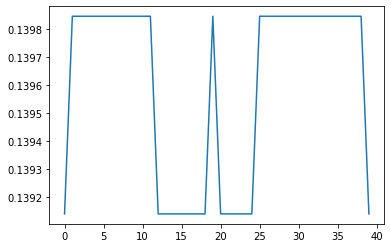

In [9]:
plt.plot(losses)

## Part 2.5 Compare results of Active Learning vs No Active Learning

In this part you need to create object of the same scikit learning class and train it on randomly selected subset of data points and compare results of 2 classifiers. Comment on your observations

In [10]:
# Compare to no Active Learning setting
# ?? how much data to train it on? same as A.L.?

## TODO: your code goes here
# select random training set
X_rand= X_train[:n_query]
y_rand = y_train[:n_query]

# train model
lr = LogisticRegression()
lr.fit(X_rand, y_rand)

offline_loss = log_loss(y_test, lr.predict_proba(X_test)) 

print('Active Learning loss:', losses[-1])
print('Offline loss (no active learning):',offline_loss)

Active Learning loss: 0.13914104993497237
Offline loss (no active learning): 0.052091379494694445


### Comment on observations
It appears that offline loss is less than active learning loss for a small sample size.